# Primer taller análisis numerico: Ejercicios de aplicación

> Sebastian Tamayo

> Emanuel Cabrera

> **advertencia**: En este trabajo no se requirió utilizar el método de posición falsa, por ende el numeral nueve (9) no aplica.

[Video explicando el primer punto](https://youtu.be/9OfU-0LyIXg)

In [1]:
# Librerias necesarias
import math
import pymethods as pm # libreria propia 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Punto 1.a

In [2]:
# Definició de constantes
tol = 5e-6 # tolerancia de 0.000005ºC
# valores iniciales
a = 0 #0ºC
b = 40 #40ºC

Para determinar la cantidad de iteraciones que requiere el método de bisección se utiliza la siguiente formula:

Sea $N$ la cantidad de iteraciones que utiliza el método de bisección, $\varepsilon$ el error. Entonces para encontrar la cantidad de iteraciones que necesita el método de bisección en el rango $[a, b]$
$$
N = \left\lceil \frac{\log\left(\frac{b - a}{\varepsilon}\right)}{\log(2)}\right\rceil = \left\lceil\log_2\left(\frac{b - a}{\varepsilon}\right)\right\rceil
$$

In [3]:
# recordar: pm es el alias para pymethods (libreria personal)
pm.bisection_iters(a, b, tol)

23

como la cantidad de iteraciones depende únicamente del rango $[a, b]$, para los tres casos la cantidad de iteraciones necesarias es la misma: 23

#### Punto 1.b

Sea $O_{sf}$ La concentración de saturación de oxígeno disietl en agua dulce.
$$
\ln{O_{sf}} = {- 139.34411 + \frac{1.575701 \times 10^{5}}{T_{a}}  - \frac{6.642308 \times 10^7}{T^{2}_{a}} + \frac{1.243800 \times 10^{11}}{T^{3}_a}}
$$
Despejando $O_{sf}$ queda:
$$
O_{sf} = e^{- 139.34411 + \frac{1.575701 \times 10^{5}}{T_{a}}  - \frac{6.642308 \times 10^7}{T^{2}_{a}} + \frac{1.243800 \times 10^{11}}{T^{3}_a}}
$$
Ahora se reemplaza $T_a = T + 273.15$
$$
O_{sf} = e^{- 139.34411 + \frac{1.575701 \times 10^{5}}{T + 273.15}  - \frac{6.642308 \times 10^7}{(T + 273.15)^{2}} + \frac{1.243800 \times 10^{11}}{(T + 273.15)^{3}}}
$$

In [4]:
def f_osf(T: float) -> float:
    return math.exp(
        -139.34411
        + (1.575701e5) / (T + 273.15)
        - (6.642308e7) / ((T + 273.15)**2)
        + (1.243800e10) / ((T + 273.15)**3)
        - (8.621949e11) / ((T + 273.15)**4)
          )

In [5]:
interval = np.linspace(a, b, 1000)  # intevalo con 1000 puntos

In [6]:
# Ahora se va a evaluar la función de 0ºC a 40ºC
f_T_values = []
for i in interval:
    f_T_values.append(f_osf(i))

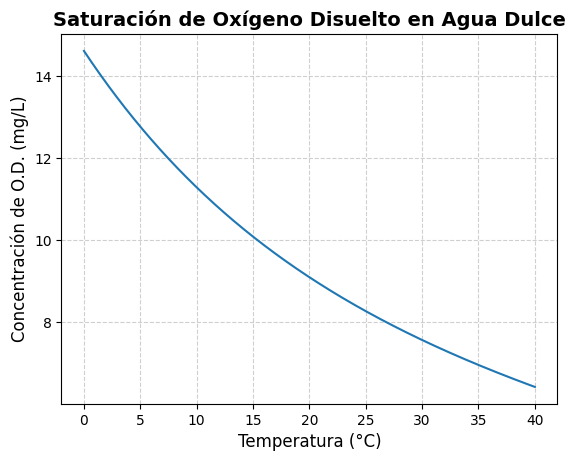

In [7]:
plt.plot(interval, f_T_values)

# Configura los ejes
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Concentración de O.D. (mg/L)', fontsize=12)

plt.title('Saturación de Oxígeno Disuelto en Agua Dulce', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Punto 2
$$
c = c_{\text{ent}}(1 - e^{-0.04t}) +c_0 e^{-0.04t}
$$

$$
c_0 = 5
$$
$$
c_{\text{ent}} = 12
$$

## Punto 2.a
Calcule el tiempo requerido para que $c$ sea el $85%$ de $c_{\text{ent}}$ con un método abierto.

In [8]:
# Primero definimos la función c(t)
# (utilizando las constantes antes definidas)
def c_t(t, c_0: float = 5.0, c_ent: float = 12.0):
    return c_ent*(1 - math.exp(-0.04 * t)) + (c_0 * math.exp(-0.04 * t))

Definimos las constanes y econtramos el $85%$ de $C_{\text{ent}}$

In [9]:
c_ent = 12
c_0 = 5
c = c_ent * (85/100)

# finimos una tolerancia adecuada para obtener
# un mejor resultado aproximado
tol = 1e-8

Definimos la función sobre la cual vamos hacer el método abierto, en este caso el método de newton

In [10]:
t = sp.Symbol('t')
f = c_ent*(1 - sp.exp(-0.04 * t)) + (c_0 * sp.exp(-0.04 * t)) - c

In [11]:
# aplicamos el método de newton
# definimos un punto de partida arbitrario
x_0 = 0
result = pm.newton_method(f, t, x_0, tol)

In [12]:
result

33.9530871038298

In [13]:
# verificamos la solución
assert pm.absolute_error(c_t(result), c) <= tol
# todo correcto

## Punto 2.b

Para este caso se ha escogido el método de bisección.

definimos la función sobre la cual se va a plicar el método numérico

In [14]:
f = lambda t : c_t(t) - c

Primero debemos escojer un rango $[a, b]$ donde $f(a) \times f(b) < 0$

In [15]:
f(10)

-2.8922403222494744

In [16]:
f(70)

1.374329561623476

In [17]:
a = 10
b = 70

In [18]:
result = pm.bisection(f, a, b, tol)

In [19]:
result

33.95308718085289

In [20]:
assert pm.absolute_error(c_t(result), c) <= tol

## Punto 3
$$
c(t) = Ate^{-t/3} (mg/ml), \text{en } t \text{ horas}
$$
- $A$ es la dosis (unidades).
- La concentración máxima segura es 1 mg/ml.

### Punto 3.a
¿Qué dosis $A$ hace que la conentración máxima sea 1 mg/ml, y cuándo ocurre esa máxima?

Para esto, necesitamos encontrar el tiempo $t$ donde $c(t)$ es máxima, derivamos

In [21]:
A = sp.Symbol('A')
t = sp.Symbol('t')
c_t = A*t*sp.exp((-1 * t) / 3)
c_t

A*t*exp(-t/3)

In [22]:
# derivamos con respecto al tiempo
dc_dt = c_t.diff(t)

In [23]:
dc_dt

-A*t*exp(-t/3)/3 + A*exp(-t/3)

Ahora igualamos a 0 para obtener los puntos criticos

In [24]:
puntos_criticos = sp.solve(dc_dt, t)

In [25]:
puntos_criticos

[3]

Se evalua con la segunda derivada en ese punto para saber si es un máximo (cuando $c''(t) < 0$) o un mínimo (cuando $c''(t) > 0$).

In [26]:
d2c_dt2 = dc_dt.diff(t)

In [27]:
d2c_dt2.evalf(subs={t: puntos_criticos[0]})

-0.122626480390481*A

como $c''(3) < 0$, entonces $c(3)$ es un máximo local.
Ahora debemos evaluar la función en 3.

In [28]:
c_t_3 = c_t.evalf(subs={t: 3})
c_t_3

1.10363832351433*A

Ahora, necesitamos que lo anterior sea $1 \frac{mg}{ml}$, entonces

In [29]:
eq = sp.Eq(c_t_3, 1)
sol = sp.solve(eq, A)
sol

[0.906093942819679]

In [30]:
# Solución
print(f"A = {sol[0]}")
print(f"La máxima concentración segura (1 mg/ml) se alcanza a las 3 horas después de la inyección")

A = 0.906093942819679
La máxima concentración segura (1 mg/ml) se alcanza a las 3 horas después de la inyección


### Punto 3.b
¿Cuándo aplicar la segunda inyección -- justo después de que la concentración haya bajado a 0.25 mg/ml?

$$
c(t) = Ate^{-t/3} = 0.25
$$
Con $A \approx 0.906093942819679$

In [31]:
A = sol[0]
c_t_ = lambda t: A * t * math.exp((-1 * t) / 3)

In [32]:
f = lambda t: c_t_(t) - 0.25 # 0.25 mg/ml es nuestra concentación objetivo
f(3), f(15)

(0.749999999999997, -0.158421805556329)

In [33]:
a = 3
b = 15
tol = 1e-10

In [34]:
c_025 = pm.bisection(f, 3, 15, tol)
c_025

11.077903585508466

In [35]:
assert pm.absolute_error(c_t_(c_025), 0.25) <= tol

In [36]:
print("Aplicar la segunda inyección 11 horas y 5 minutos despues de la primera")

Aplicar la segunda inyección 11 horas y 5 minutos despues de la primera


### Punto 3.c
Si las concentraciones se suman y la segunda inyección es el 75% de la dosis original, ¿Cuándo aplicar la tercera inyección?

El modelo después de la segunda inyección (en $t \geq t_2$, con $t_2$ el tiempo de la segunda inyección):
$$
c_{\text{total}}(t) = Ate^{-t/3} + 0.75A(t- t_2)e^{-(t - t_2) / 3}
$$
Se busca un $t > t_2$ tal que
$$
c_{\text{total}}(t) = 0.25
$$

In [37]:
t_2 = c_025
A, t_2

(0.906093942819679, 11.077903585508466)

In [38]:
f = lambda t : A * t * math.exp((-1 * t) / 3) + 0.75*A*(t - t_2)*math.exp((-1 * (t - t_2)) / 3)
g = lambda t: f(t) - 0.25 # 0.25 concentración buscada

In [39]:
g(t_2 + 1), g(100)

(0.432236620205665, -0.249999999991598)

In [40]:
a = t_2 + 1
b = 100

In [41]:
t_3 = pm.bisection(g, a, b, tol)

In [42]:
print("La tercera inyección deberia aplicarse aproximadamente 21 horas 14 minutos después de la primera inyección")

La tercera inyección deberia aplicarse aproximadamente 21 horas 14 minutos después de la primera inyección


In [43]:
interval = np.linspace(0, 100, 1000)

In [44]:
values = []
for i in interval:
    values.append(c_t_(i))

Text(0, 0.5, 'Concentración del medicamento')

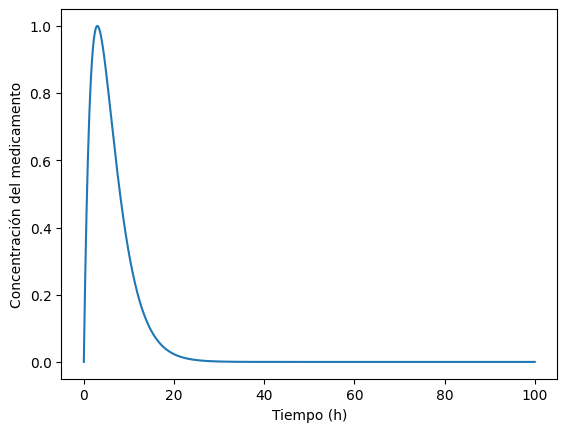

In [45]:
plt.plot(interval, values)
plt.title("")
plt.xlabel("Tiempo (h)")
plt.ylabel("Concentración del medicamento")

## Punto 4
$$
K = \frac{c_{c, 0} + x}{(c_{a, 0 - 2x})^{2}(c_{b, 0} - x)}
$$

In [46]:
K = 0.016
c_a0 = 42
c_b0 = 28
c_c0 = 4

### Punto 4.a
metodo abierto

In [47]:
x_0 = 0.1
x_1 = 5

In [48]:
g = lambda x: c_c0 + x - K * (c_a0 - 2*x)**2 * (c_b0 - x)

In [49]:
result = pm.secante(g, x_0, x_1, tol)[0]

In [50]:
assert g(result) <= tol

### Punto 4.b
método cerrado

In [51]:
g(0), g(20)

(-786.272, 23.488)

In [52]:
x = pm.bisection(g, a, b, tol)

In [53]:
assert g(x) <= tol